In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("data/zuu crew scores.csv")
df

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
...,...,...,...,...,...,...,...,...,...,...
145,Student_146,3,83.9,13.3,6,0,48.9,2.9,Foundations of ML,31.9
146,Student_147,3,73.4,64.9,5,0,77.0,4.5,Production-Ready ML Systems,47.9
147,Student_148,3,90.8,55.2,4,1,68.3,4.6,Foundations of ML,52.8
148,Student_149,2,64.3,14.6,4,0,44.6,2.7,Production-Ready ML Systems,29.6


In [37]:
X = df["Attendance"].values.reshape(-1,1)
Y = df["CapstoneScore"].values

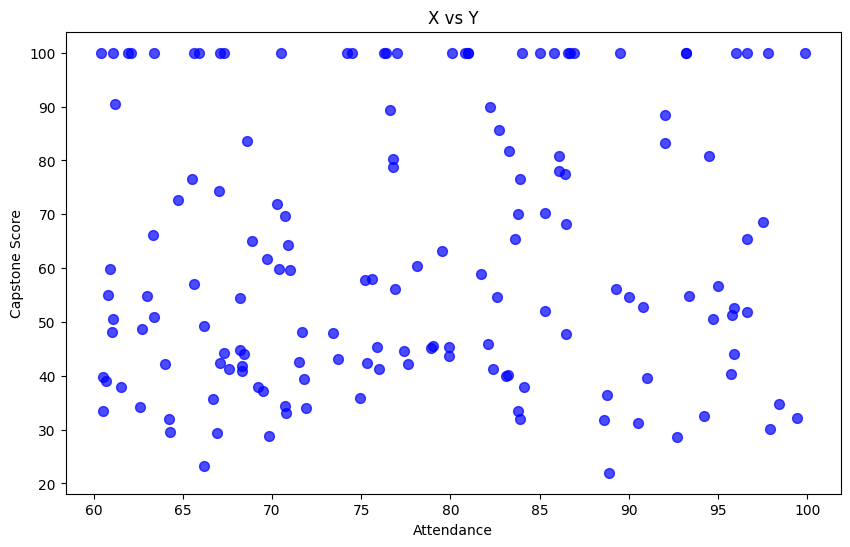

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7, color='blue', s=50)
plt.xlabel('Attendance')
plt.ylabel('Capstone Score')
plt.title('X vs Y')
plt.show()

In [39]:
def compute_cost(X, y, beta_0, beta_1):
    """ 
    Calculate the Mean Squared Error cost using the 1/(2m) convention.

    J(β0, β1) = (1/(2m)) * Σ_i ( (β0 + β1 * x_i) - y_i )^2

    Args:
        X (np.ndarray): 1D array of shape (m,) with feature values x_i.
        y (np.ndarray): 1D array of shape (m,) with targets y_i.
        beta_0 (float): Intercept term β0.
        beta_1 (float): Slope term β1.

    Returns:
        float: Scalar cost J.
    """

    m = len(y)
    y_hat = beta_0 + X.dot(beta_1)

    cost = (1 / (2 * m))* np.sum((y_hat - y) ** 2)
    return cost


In [40]:
def compute_gradients(X, y, beta_0, beta_1):
    """ 
    Calculate partial derivatives of J wrt β0 and β1 (with 1/(2m) loss).

    ∂J/∂β0 = (1/m) * Σ (ŷ - y)
    ∂J/∂β1 = (1/m) * Σ (ŷ - y) * x

    Args:
        X (np.ndarray): 1D array of shape (m,) with feature values x_i.
        y (np.ndarray): 1D array of shape (m,) with targets y_i.
        beta_0 (float): Current β0.
        beta_1 (float): Current β1.

    Returns:
        Tuple[float, float]: (dJ_dβ0, dJ_dβ1).
    """

    m = len(y)
    y_hat = beta_0 + X.dot(beta_1)

    dJ_dbeta_0 = (1 / m) * np.sum(y_hat - y)
    dJ_dbeta1 = (1 / m) * X.T.dot(y_hat - y)

    return dJ_dbeta_0, dJ_dbeta1


In [41]:
def gradient_descent(X, y, learning_rate):
    """ Optimize parameters

    Args:
        X (_type_): _description_
        y (_type_): _description_
        learning_rate (_type_): _description_
    """

    beta = np.random.randn(2)

    beta_0 = beta[0]
    beta_1 = beta[1]

    n_iter = 1000

    cost_history = []

    for i in range(n_iter):
        cost = compute_cost(X, y, beta_0, beta_1)
        cost_history.append(cost)
        dJ_dbeta0, dJ_dbeta1 = compute_gradients(X, y, beta_0, beta_1)

        beta_0 = beta_0 - learning_rate * dJ_dbeta0
        beta_1 = beta_1 - learning_rate * dJ_dbeta1

   
    return cost_history, beta_0, beta_1



In [42]:
def predict(X, beta_0, beta_1):
    """ Make predictions

    Args:
        X (_type_): _description_
        beta_0 (_type_): _description_
        beta_1 (_type_): _description_
    """
    value = beta_0 + beta_1 * X
    print(f'Predict value : {value}')

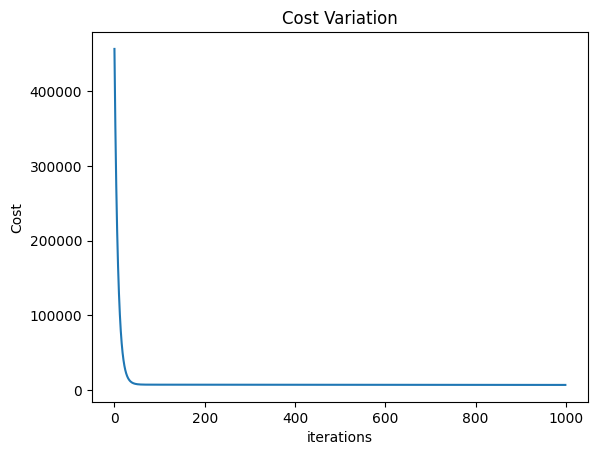

In [46]:
lr = 0.00001
cost_history, beta_0, beta_1 = gradient_descent(X, Y, lr)

plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

/opt/anaconda3/envs/foml/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/m_/q43ydt0x1cv5bb2frz829m5h0000gn/T/ipykernel_39671/1422784549.py:20: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m))* np.sum((y_hat - y) ** 2)
/var/folders/m_/q43ydt0x1cv5bb2frz829m5h0000gn/T/ipykernel_39671/1491648169.py:22: RuntimeWarning: overflow encountered in dot
  dJ_dbeta1 = (1 / m) * X.T.dot(y_hat - y)
/var/folders/m_/q43ydt0x1cv5bb2frz829m5h0000gn/T/ipykernel_39671/297652301.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  beta_0 = beta_0 - learning_rate * dJ_dbeta0
/var/folders/m_/q43ydt0x1cv5bb2frz829m5h0000gn/T/ipykernel_39671/297652301.py:25: RuntimeWarning: invalid value encountered in subtract
  beta_1 = beta_1 - learning_rate * dJ_dbeta1


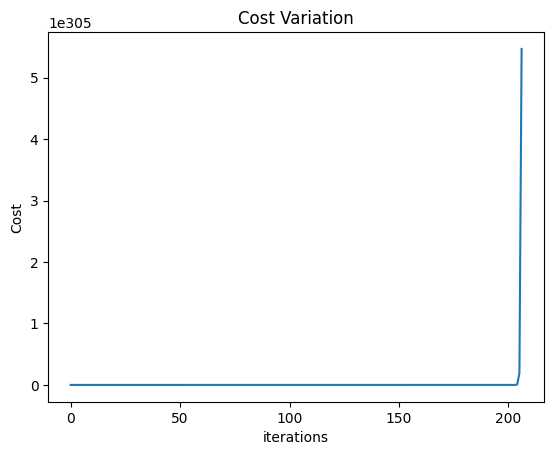

In [47]:
lr = 0.001
cost_history, beta_0, beta_1 = gradient_descent(X, Y, lr)

plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

/var/folders/m_/q43ydt0x1cv5bb2frz829m5h0000gn/T/ipykernel_39671/1422784549.py:20: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m))* np.sum((y_hat - y) ** 2)
/var/folders/m_/q43ydt0x1cv5bb2frz829m5h0000gn/T/ipykernel_39671/1491648169.py:22: RuntimeWarning: overflow encountered in dot
  dJ_dbeta1 = (1 / m) * X.T.dot(y_hat - y)
/var/folders/m_/q43ydt0x1cv5bb2frz829m5h0000gn/T/ipykernel_39671/297652301.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  beta_0 = beta_0 - learning_rate * dJ_dbeta0
/var/folders/m_/q43ydt0x1cv5bb2frz829m5h0000gn/T/ipykernel_39671/297652301.py:25: RuntimeWarning: invalid value encountered in subtract
  beta_1 = beta_1 - learning_rate * dJ_dbeta1


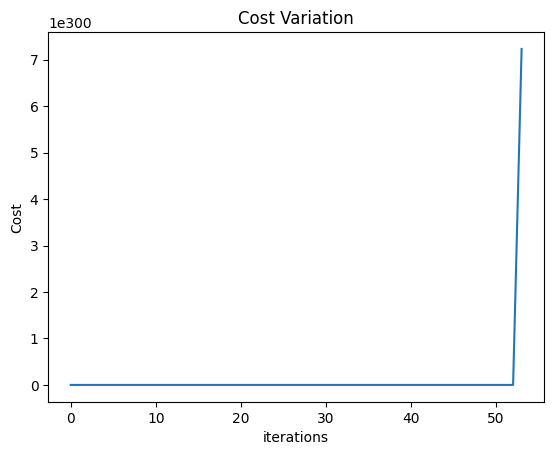

In [48]:
lr = 0.1
cost_history, beta_0, beta_1 = gradient_descent(X, Y, lr)

plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

/opt/anaconda3/envs/foml/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/m_/q43ydt0x1cv5bb2frz829m5h0000gn/T/ipykernel_39671/1422784549.py:20: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m))* np.sum((y_hat - y) ** 2)
/var/folders/m_/q43ydt0x1cv5bb2frz829m5h0000gn/T/ipykernel_39671/1491648169.py:22: RuntimeWarning: overflow encountered in dot
  dJ_dbeta1 = (1 / m) * X.T.dot(y_hat - y)
/var/folders/m_/q43ydt0x1cv5bb2frz829m5h0000gn/T/ipykernel_39671/297652301.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  beta_0 = beta_0 - learning_rate * dJ_dbeta0
/var/folders/m_/q43ydt0x1cv5bb2frz829m5h0000gn/T/ipykernel_39671/297652301.py:25: RuntimeWarning: invalid value encountered in subtract
  beta_1 = beta_1 - learning_rate * dJ_dbeta1


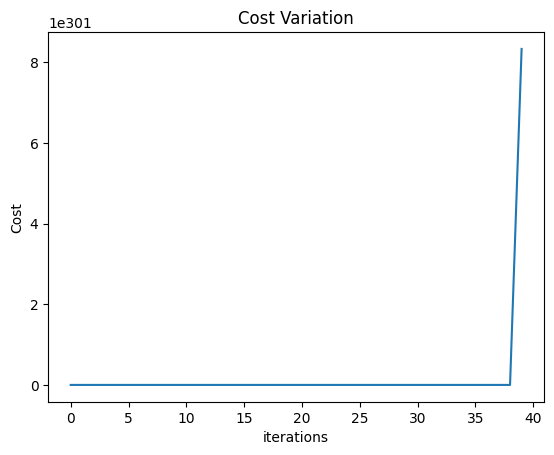

In [49]:
lr = 1.0
cost_history, beta_0, beta_1 = gradient_descent(X, Y, lr)

plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()